In [19]:
# Import necessary libraries
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model
import torch

In [2]:
np.random.seed(42)

# Load the data
data = pd.read_csv("name_gender.csv")
print(data.dtypes)
print(data.head(10))
print(data.shape)
print(data['gender'].value_counts())

name            object
gender          object
probability    float64
dtype: object
        name gender  probability
0      Aaban      M     1.000000
1      Aabha      F     1.000000
2      Aabid      M     1.000000
3  Aabriella      F     1.000000
4       Aada      F     1.000000
5      Aadam      M     1.000000
6      Aadan      M     1.000000
7    Aadarsh      M     1.000000
8      Aaden      M     0.998815
9     Aadesh      M     1.000000
(78397, 3)
gender
F    49519
M    28877
Name: count, dtype: int64


In [3]:
## Data Preprocessing
def prep(data):
    # Remove non-ascii characters
    data['name'] = data['name'].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))

    # Define max_length
    max_length = max([len(name) for name in data['name']])

    # Convert gender to binary labels
    data['gender'] = data['gender'].apply(lambda x: 0 if x == "F" else 1)

    # Convert names to one-hot representation
    all_chars = set(''.join(data['name']))
    char_to_index = {char: i for i, char in enumerate(all_chars)}
    num_chars = len(char_to_index)

    X = np.zeros((len(data), max_length, num_chars))
    Y = np.zeros((len(data), 2))

    for i, name in enumerate(data['name']):
        for t, char in enumerate(name):
            if char in char_to_index:
                X[i, t, char_to_index[char]] = 1
        Y[i, data['gender'][i]] = 1
        
    return X, Y, max_length, num_chars

X, Y, max_length, num_chars = prep(data)

print(X.shape)
print(Y.shape)

# Define the dataset sizes to test
dataset_sizes = [0.25, 0.5, 0.75, 1.0]

validation_split=0.1
batch_size=128
epochs=20
verbose=1

(78397, 15, 45)
(78397, 2)


## Simple RNN

C:\Users\prane\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training the model at 25.0% of the data
Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.6411 - loss: 0.6300 - val_accuracy: 0.7564 - val_loss: 0.4954
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7795 - loss: 0.4721 - val_accuracy: 0.7921 - val_loss: 0.4496
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8070 - loss: 0.4287 - val_accuracy: 0.8068 - val_loss: 0.4327
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8094 - loss: 0.4261 - val_accuracy: 0.8112 - val_loss: 0.4175
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8256 - loss: 0.4025 - val_accuracy: 0.8151 - val_loss: 0.4096
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8319 - loss: 0.3822 - val_accuracy: 0.8278 - val_loss: 0.3915
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8424 - loss: 0.3642 - val_accuracy: 0.8380 - val_loss: 0.3851
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - 

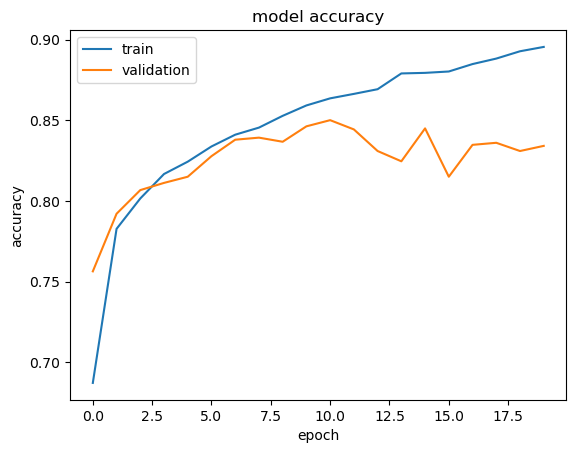

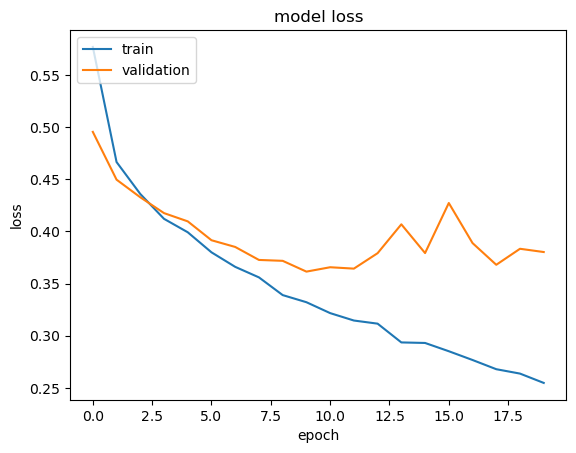

Testing the model at 25.0% of the data

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8340 - loss: 0.3923
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

Training the model at 50.0% of the data
Epoch 1/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.6322 - loss: 0.6106 - val_accuracy: 0.7857 - val_loss: 0.4658
Epoch 2/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7896 - loss: 0.4547 - val_accuracy: 0.8122 - val_loss: 0.4300
Epoch 3/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8128 - loss: 0.4159 - val_accuracy: 0.8262 - val_loss: 0.3992
Epoch 4/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8296 - loss: 0.3896 - val_accuracy: 0.8345 - val_loss: 0.3747
Epoch 5/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8381 - loss: 0.3671 - val_accuracy: 0.8332 - val_loss: 0.3749
Epoch 6/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8464 - loss: 0.3573 - val_accuracy: 0.8320 - val_loss: 0.3750
Epoch 7/20
221/221 ━━━━━━━━━━

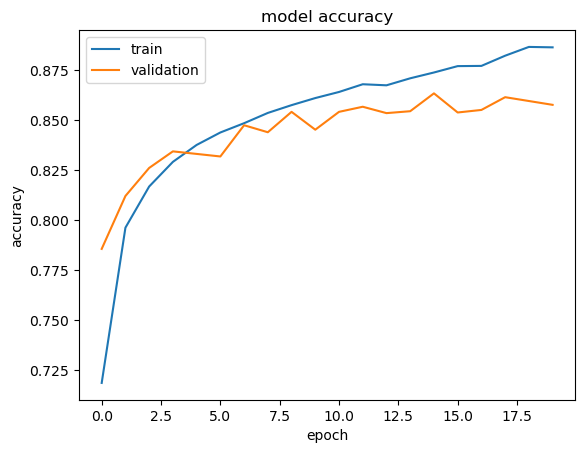

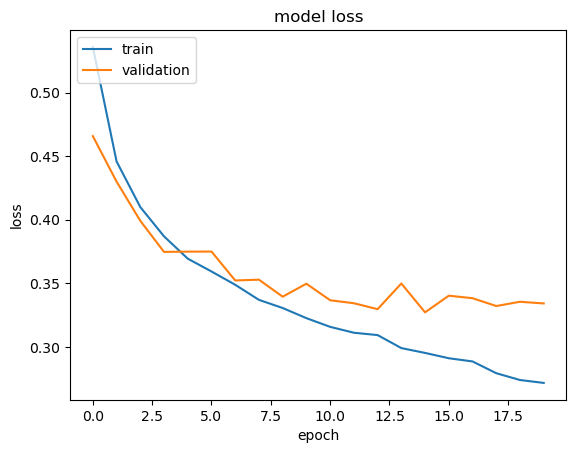

Testing the model at 50.0% of the data

245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8494 - loss: 0.3575
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

Training the model at 75.0% of the data
Epoch 1/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7206 - loss: 0.5464 - val_accuracy: 0.8012 - val_loss: 0.4414
Epoch 2/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8086 - loss: 0.4279 - val_accuracy: 0.8225 - val_loss: 0.4046
Epoch 3/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8236 - loss: 0.3980 - val_accuracy: 0.8382 - val_loss: 0.3713
Epoch 4/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8380 - loss: 0.3751 - val_accuracy: 0.8486 - val_loss: 0.3504
Epoch 5/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8458 - loss: 0.3535 - val_accuracy: 0.8478 - val_loss: 0.3440
Epoch 6/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8506 - loss: 0.3435 - val_accuracy: 0.8529 - val_loss: 0.3387
Epoch 7/20
331/331 ━━━━━━━━━━

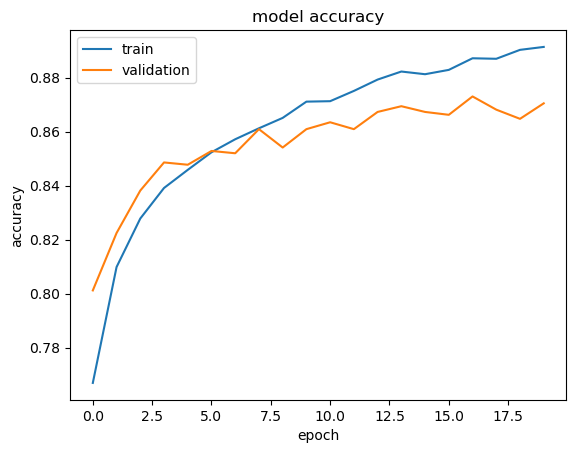

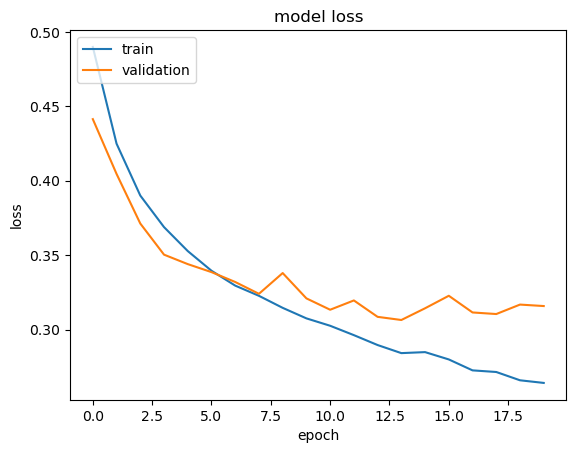

Testing the model at 75.0% of the data

368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8598 - loss: 0.3336
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Training the model at 100.0% of the data
Epoch 1/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7177 - loss: 0.5398 - val_accuracy: 0.8171 - val_loss: 0.4069
Epoch 2/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8173 - loss: 0.4069 - val_accuracy: 0.8402 - val_loss: 0.3659
Epoch 3/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8371 - loss: 0.3694 - val_accuracy: 0.8493 - val_loss: 0.3450
Epoch 4/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8471 - loss: 0.3457 - val_accuracy: 0.8629 - val_loss: 0.3275
Epoch 5/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8553 - loss: 0.3359 - val_accuracy: 0.8642 - val_loss: 0.3318
Epoch 6/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8603 - loss: 0.3244 - val_accuracy: 0.8591 - val_loss: 0.3363
Epoch 7/20
441/441 ━━━━━━━

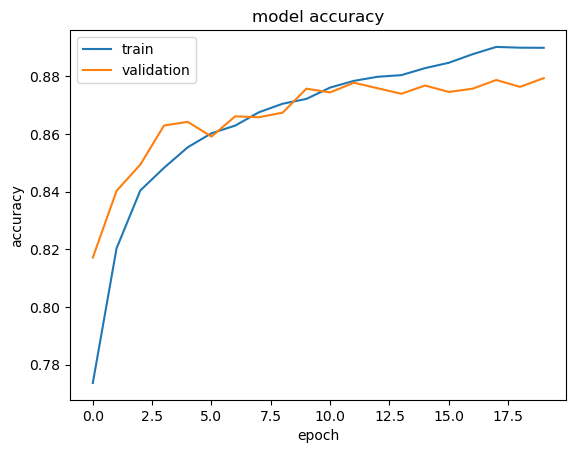

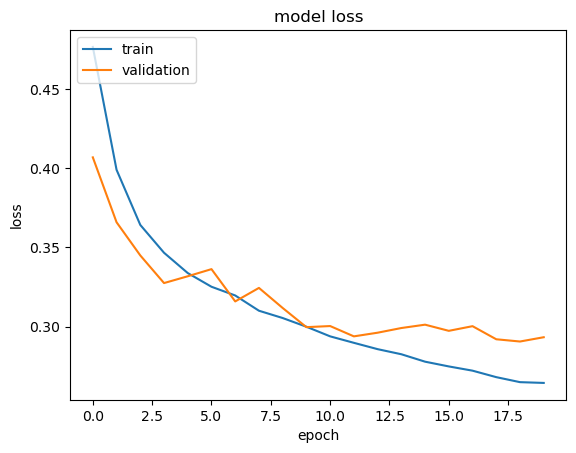

Testing the model at 100.0% of the data

490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8656 - loss: 0.3156
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [4]:
model_name = 'RNN.h5'

rnn_results = []

for dataset_size in dataset_sizes:
    
    # Set the random seed for reproducibility
    np.random.seed(42)

    # Get samples of the data
    n_samples = int(dataset_size * X.shape[0])
    indices = np.random.choice(X.shape[0], size=n_samples, replace=False)
    X_ = X[indices]
    Y_ = Y[indices]
    
    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size=0.2, random_state=42)
    
    # Build the model
    model = Sequential()
    model.add(SimpleRNN(units=32, input_shape=(None, num_chars), return_sequences=True))
    model.add(SimpleRNN(units=32))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=2, activation='softmax'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    print(f"\nTraining the model at {dataset_size*100}% of the data")
    history = model.fit(X_train, Y_train, validation_split=validation_split, 
                        batch_size=batch_size, epochs=epochs, verbose=verbose)

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    # Evaluate the model
    print(f"Testing the model at {dataset_size*100}% of the data\n")
    loss, accuracy = model.evaluate(X_test, Y_test, verbose=1)

    # Calculate the class-wise accuracy
    Y_pred = model.predict(X_test)
    Y_pred = np.argmax(Y_pred, axis=1)

    female_indices = np.where(Y_test[:,0] == 1)[0]
    male_indices = np.where(Y_test[:,1] == 1)[0]

    female_accuracy = np.sum(Y_pred[female_indices] == 0) / len(female_indices)
    male_accuracy = np.sum(Y_pred[male_indices] == 1) / len(male_indices)
    
    rnn_results.append({
        'dataset_size': dataset_size,
        'overall_accuracy': accuracy,
        'female_accuracy': female_accuracy,
        'male_accuracy': male_accuracy})

save_model(model, model_name)

## LSTM



Training the model at 25.0% of the data
Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.6540 - loss: 0.6255 - val_accuracy: 0.7328 - val_loss: 0.5248
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7619 - loss: 0.4985 - val_accuracy: 0.7717 - val_loss: 0.4852
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.7754 - loss: 0.4783 - val_accuracy: 0.7781 - val_loss: 0.4843
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7869 - loss: 0.4625 - val_accuracy: 0.7819 - val_loss: 0.4643
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7931 - loss: 0.4530 - val_accuracy: 0.7851 - val_loss: 0.4505
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8018 - loss: 0.4332 - val_accuracy: 0.7966 - val_loss: 0.4377
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8097 - loss: 0.4192 - val_accuracy: 0.8151 - val_loss: 0.4066
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step -

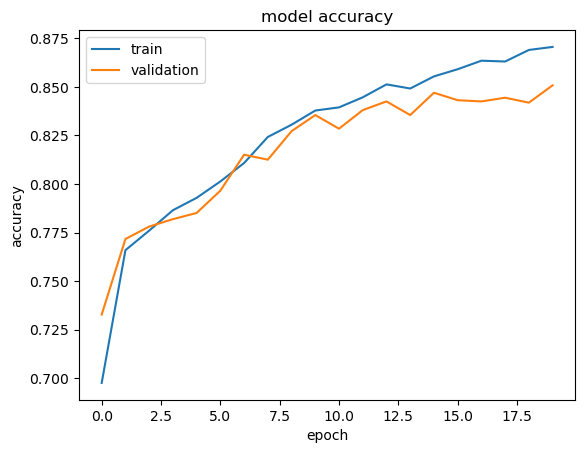

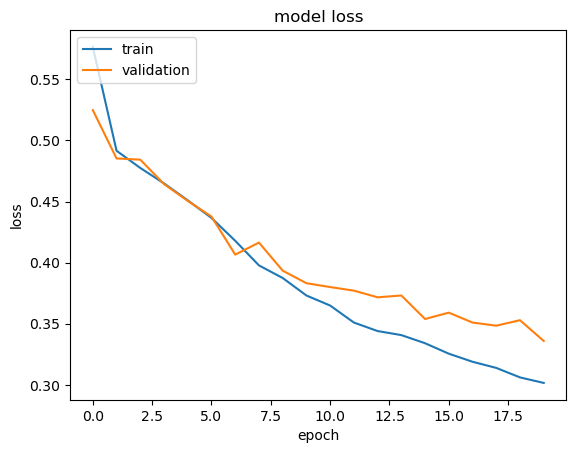

Testing the model at 25.0% of the data

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8561 - loss: 0.3280
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


Training the model at 50.0% of the data
Epoch 1/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.6926 - loss: 0.5819 - val_accuracy: 0.7640 - val_loss: 0.4885
Epoch 2/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.7696 - loss: 0.4861 - val_accuracy: 0.7841 - val_loss: 0.4653
Epoch 3/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7882 - loss: 0.4548 - val_accuracy: 0.8166 - val_loss: 0.4173
Epoch 4/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.8109 - loss: 0.4165 - val_accuracy: 0.8380 - val_loss: 0.3811
Epoch 5/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.8319 - loss: 0.3819 - val_accuracy: 0.8335 - val_loss: 0.3621
Epoch 6/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.8424 - loss: 0.3574 - val_accuracy: 0.8479 - val_loss: 0.3496
Epoch 7/20
221/221 ━━━━━━

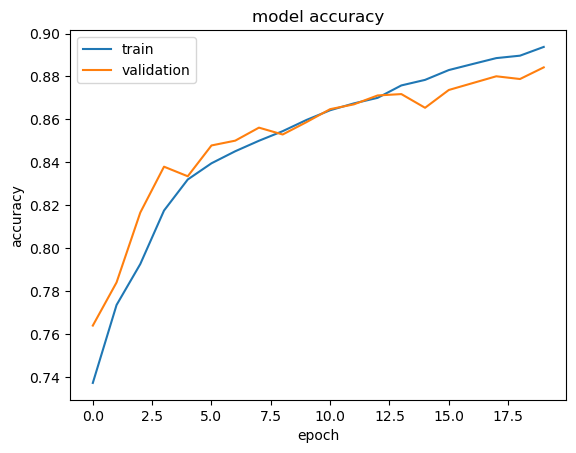

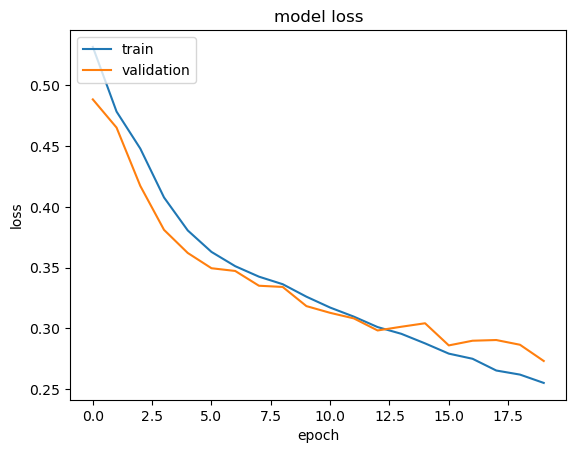

Testing the model at 50.0% of the data

245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8664 - loss: 0.3046
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


Training the model at 75.0% of the data
Epoch 1/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.7084 - loss: 0.5644 - val_accuracy: 0.7832 - val_loss: 0.4691
Epoch 2/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7849 - loss: 0.4631 - val_accuracy: 0.8206 - val_loss: 0.4024
Epoch 3/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.8165 - loss: 0.4069 - val_accuracy: 0.8236 - val_loss: 0.3844
Epoch 4/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.8379 - loss: 0.3674 - val_accuracy: 0.8455 - val_loss: 0.3518
Epoch 5/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8427 - loss: 0.3554 - val_accuracy: 0.8516 - val_loss: 0.3373
Epoch 6/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.8530 - loss: 0.3374 - val_accuracy: 0.8629 - val_loss: 0.3245
Epoch 7/20
331/331 ━━━

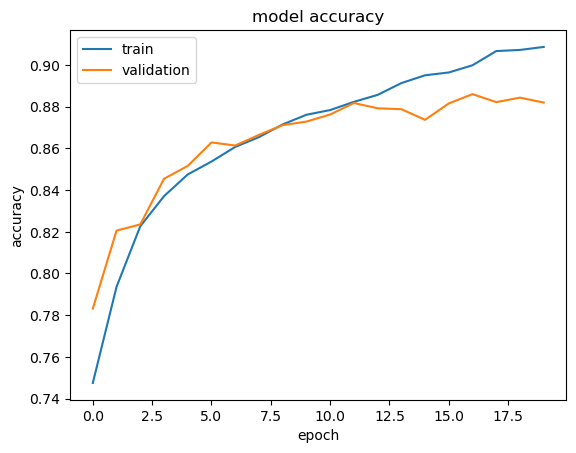

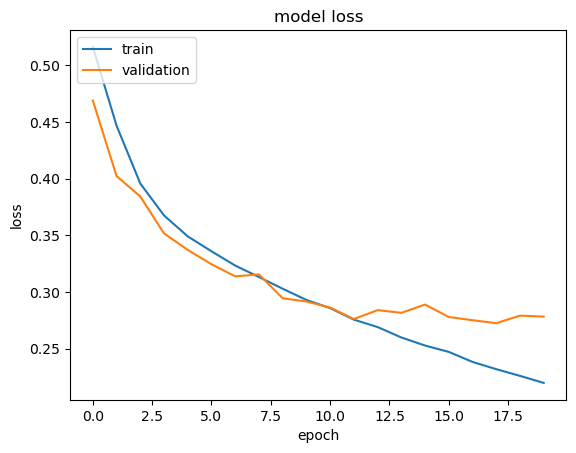

Testing the model at 75.0% of the data

368/368 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8841 - loss: 0.2636
368/368 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step


Training the model at 100.0% of the data
Epoch 1/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 26s 47ms/step - accuracy: 0.7171 - loss: 0.5505 - val_accuracy: 0.7828 - val_loss: 0.4665
Epoch 2/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.7990 - loss: 0.4412 - val_accuracy: 0.8404 - val_loss: 0.3713
Epoch 3/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.8350 - loss: 0.3734 - val_accuracy: 0.8540 - val_loss: 0.3427
Epoch 4/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8476 - loss: 0.3464 - val_accuracy: 0.8619 - val_loss: 0.3205
Epoch 5/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8602 - loss: 0.3269 - val_accuracy: 0.8673 - val_loss: 0.3095
Epoch 6/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8637 - loss: 0.3178 - val_accuracy: 0.8673 - val_loss: 0.3098
Epoch 7/20
441/441 ━

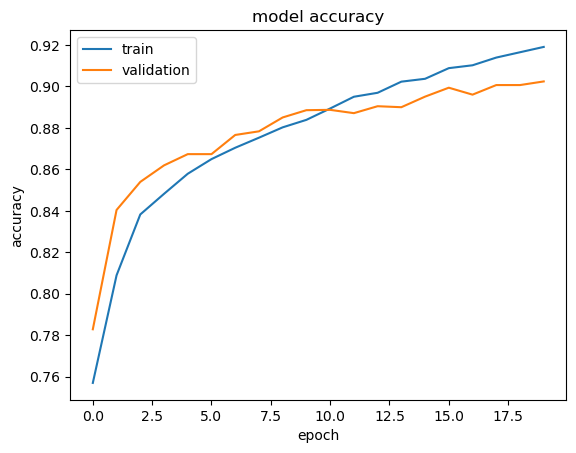

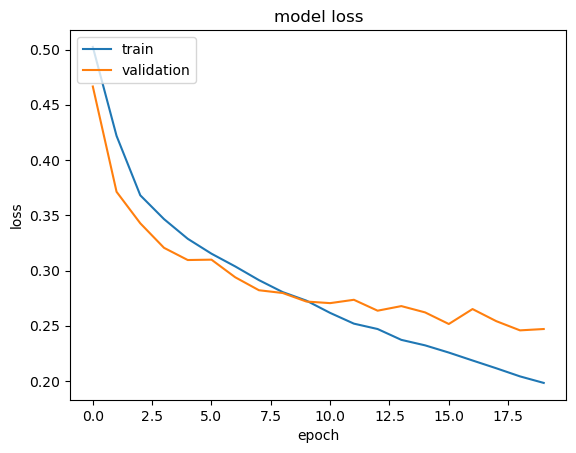

Testing the model at 100.0% of the data

490/490 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8988 - loss: 0.2507
490/490 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


In [5]:
model_name = 'LSTM.h5'

lstm_results = []

for dataset_size in dataset_sizes:
    
    # Set the random seed for reproducibility
    np.random.seed(42)

    # Get samples of the data
    n_samples = int(dataset_size * X.shape[0])
    indices = np.random.choice(X.shape[0], size=n_samples, replace=False)
    X_ = X[indices]
    Y_ = Y[indices]
    
    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size=0.2, random_state=42)
    
    # Build the model
    model = Sequential()
    model.add(LSTM(128, input_shape=(None, num_chars)))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    print(f"\n\nTraining the model at {dataset_size*100}% of the data")
    history = model.fit(X_train, Y_train, validation_split=validation_split, 
                        batch_size=batch_size, epochs=epochs, verbose=verbose)

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    # Evaluate the model
    print(f"Testing the model at {dataset_size*100}% of the data\n")
    loss, accuracy = model.evaluate(X_test, Y_test, verbose=1)

    # Calculate the class-wise accuracy
    Y_pred = model.predict(X_test)
    Y_pred = np.argmax(Y_pred, axis=1)

    female_indices = np.where(Y_test[:,0] == 1)[0]
    male_indices = np.where(Y_test[:,1] == 1)[0]

    female_accuracy = np.sum(Y_pred[female_indices] == 0) / len(female_indices)
    male_accuracy = np.sum(Y_pred[male_indices] == 1) / len(male_indices)
    
    lstm_results.append({
        'dataset_size': dataset_size,
        'overall_accuracy': accuracy,
        'female_accuracy': female_accuracy,
        'male_accuracy': male_accuracy})

save_model(model, model_name)

## GRU


Training the model at 25.0% of the data
Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.6340 - loss: 0.6615 - val_accuracy: 0.7372 - val_loss: 0.5485
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7474 - loss: 0.5283 - val_accuracy: 0.7659 - val_loss: 0.4959
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7847 - loss: 0.4691 - val_accuracy: 0.7844 - val_loss: 0.4632
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7911 - loss: 0.4548 - val_accuracy: 0.7985 - val_loss: 0.4547
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8021 - loss: 0.4380 - val_accuracy: 0.7959 - val_loss: 0.4296
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8163 - loss: 0.4192 - val_accuracy: 0.8093 - val_loss: 0.4258
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8180 - loss: 0.4028 - val_accuracy: 0.8163 - val_loss: 0.4047
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - 

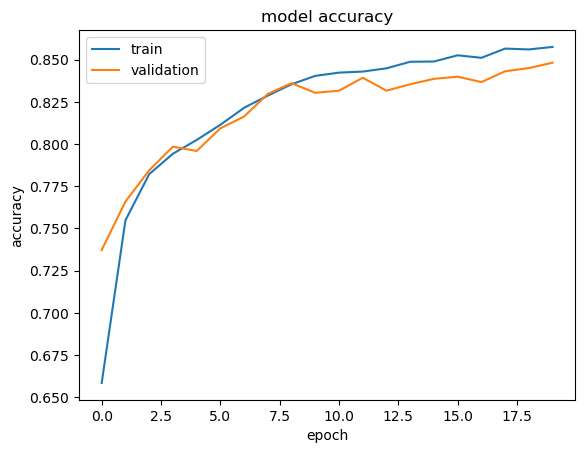

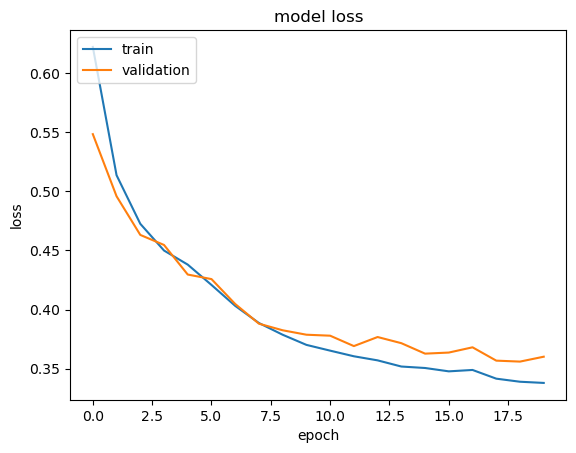

Testing the model at 25.0% of the data

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8484 - loss: 0.3545
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Training the model at 50.0% of the data
Epoch 1/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.6521 - loss: 0.6294 - val_accuracy: 0.7679 - val_loss: 0.4865
Epoch 2/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7728 - loss: 0.4793 - val_accuracy: 0.8029 - val_loss: 0.4383
Epoch 3/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8064 - loss: 0.4313 - val_accuracy: 0.8154 - val_loss: 0.4140
Epoch 4/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8166 - loss: 0.4115 - val_accuracy: 0.8348 - val_loss: 0.3778
Epoch 5/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8279 - loss: 0.3853 - val_accuracy: 0.8399 - val_loss: 0.3615
Epoch 6/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8366 - loss: 0.3752 - val_accuracy: 0.8450 - val_loss: 0.3537
Epoch 7/20
221/221 ━━━━━━━━━━

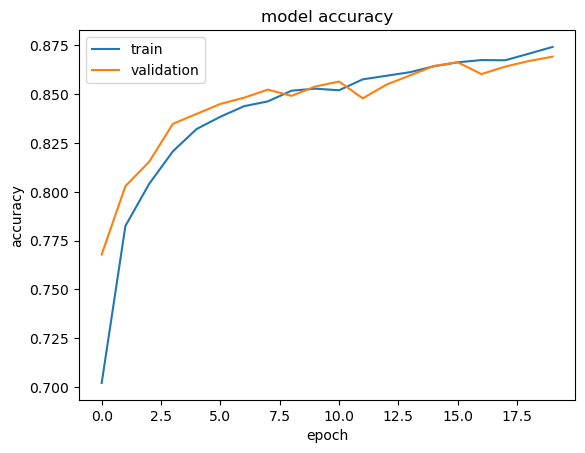

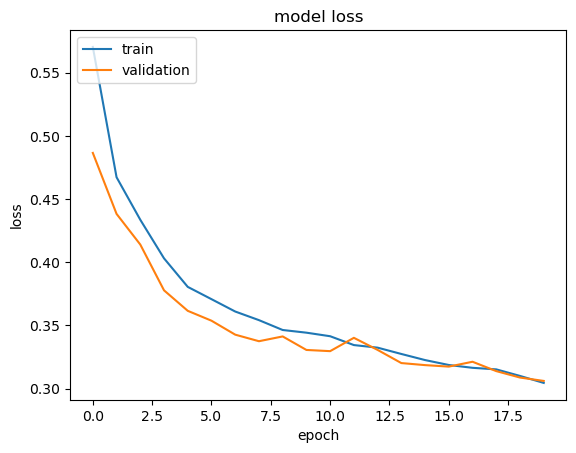

Testing the model at 50.0% of the data

245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8511 - loss: 0.3346
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Training the model at 75.0% of the data
Epoch 1/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6805 - loss: 0.6028 - val_accuracy: 0.7925 - val_loss: 0.4592
Epoch 2/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7979 - loss: 0.4485 - val_accuracy: 0.8102 - val_loss: 0.4177
Epoch 3/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8118 - loss: 0.4167 - val_accuracy: 0.8216 - val_loss: 0.3942
Epoch 4/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8287 - loss: 0.3853 - val_accuracy: 0.8408 - val_loss: 0.3567
Epoch 5/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8372 - loss: 0.3666 - val_accuracy: 0.8412 - val_loss: 0.3505
Epoch 6/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8434 - loss: 0.3555 - val_accuracy: 0.8486 - val_loss: 0.3430
Epoch 7/20
331/331 ━━━━━━━━━

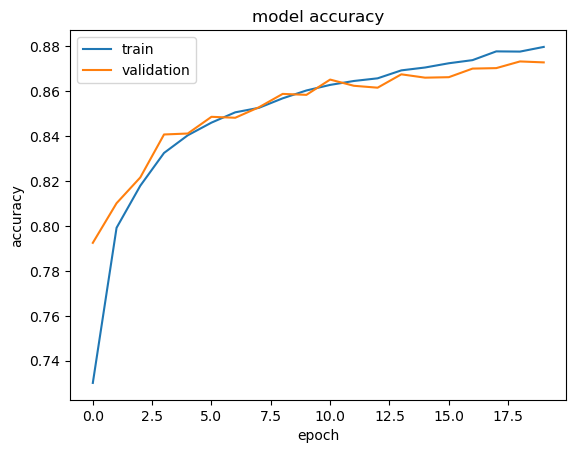

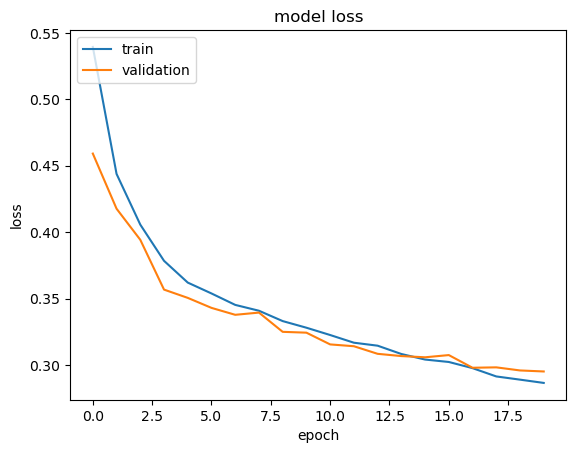

Testing the model at 75.0% of the data

368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8752 - loss: 0.2949
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Training the model at 100.0% of the data
Epoch 1/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.6899 - loss: 0.5878 - val_accuracy: 0.8005 - val_loss: 0.4422
Epoch 2/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8017 - loss: 0.4392 - val_accuracy: 0.8281 - val_loss: 0.3901
Epoch 3/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8248 - loss: 0.3964 - val_accuracy: 0.8484 - val_loss: 0.3533
Epoch 4/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8362 - loss: 0.3694 - val_accuracy: 0.8570 - val_loss: 0.3401
Epoch 5/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8476 - loss: 0.3518 - val_accuracy: 0.8602 - val_loss: 0.3287
Epoch 6/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8537 - loss: 0.3391 - val_accuracy: 0.8648 - val_loss: 0.3262
Epoch 7/20
441/441 ━━━━━━━

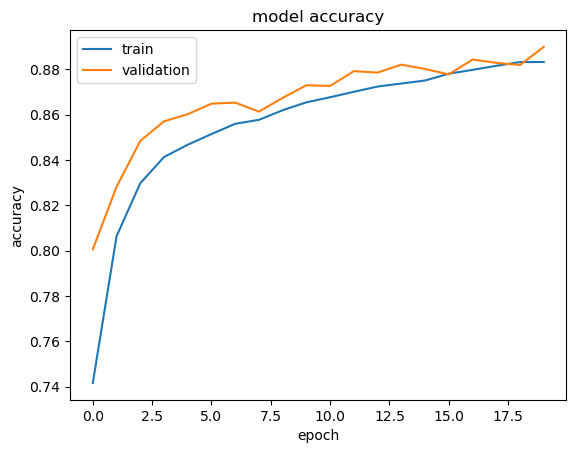

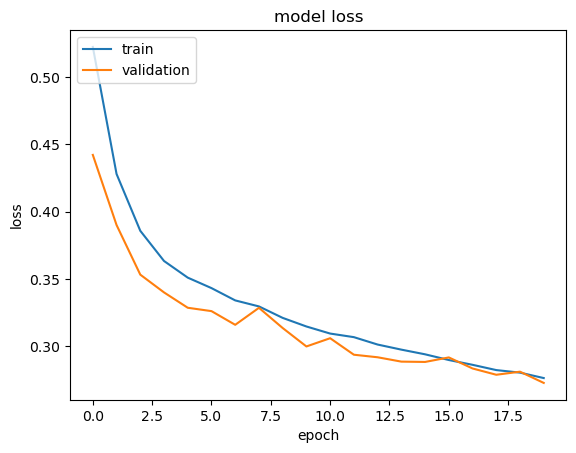

Testing the model at 100.0% of the data

490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8813 - loss: 0.2871
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [6]:
model_name = 'GRU.h5'

gru_results = []

for dataset_size in dataset_sizes:
    
    # Set the random seed for reproducibility
    np.random.seed(42)

    # Get samples of the data
    n_samples = int(dataset_size * X.shape[0])
    indices = np.random.choice(X.shape[0], size=n_samples, replace=False)
    X_ = X[indices]
    Y_ = Y[indices]
    
    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size=0.2, random_state=42)
    
    # Build the model
    model = Sequential([
        GRU(32, input_shape=(max_length, num_chars)),
        Dense(16, activation='relu'),
        Dense(2, activation='softmax')])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    print(f"\nTraining the model at {dataset_size*100}% of the data")
    history = model.fit(X_train, Y_train, validation_split=validation_split, 
                        batch_size=batch_size, epochs=epochs, verbose=verbose)

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    # Evaluate the model
    print(f"Testing the model at {dataset_size*100}% of the data\n")
    loss, accuracy = model.evaluate(X_test, Y_test, verbose=1)

    # Calculate the class-wise accuracy
    Y_pred = model.predict(X_test)
    Y_pred = np.argmax(Y_pred, axis=1)

    female_indices = np.where(Y_test[:,0] == 1)[0]
    male_indices = np.where(Y_test[:,1] == 1)[0]

    female_accuracy = np.sum(Y_pred[female_indices] == 0) / len(female_indices)
    male_accuracy = np.sum(Y_pred[male_indices] == 1) / len(male_indices)
    
    gru_results.append({
        'dataset_size': dataset_size,
        'overall_accuracy': accuracy,
        'female_accuracy': female_accuracy,
        'male_accuracy': male_accuracy})

save_model(model, model_name)

In [7]:
classi_model1 = load_model('RNN.h25')
classi_model2 = load_model('LSTM.h5')
classi_model3 = load_model('GRU.h5')

print(classi_model1.summary())
print(classi_model2.summary())
print(classi_model3.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)             │ (None, None, 32)            │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,820 (26.64 KB)

 Trainable params: 6,818 (26.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 128)                 │          89,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,348 (349.02 KB)

 Trainable params: 89,346 (349.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                          │ (None, 32)                  │           7,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,148 (31.83 KB)

 Trainable params: 8,146 (31.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


In [8]:
def pyDFrame(mod_name, results):
    df = pd.DataFrame(results)
    df.insert(0, 'model', mod_name)
    return df

rnn_df = pyDFrame("SimpleRNN", rnn_results)
lstm_df = pyDFrame("LSTM", lstm_results)
gru_df = pyDFrame("GRU", gru_results)

df = pd.concat([rnn_df, lstm_df, gru_df])
df = df.reset_index(drop=True)

df

,model,dataset_size,overall_accuracy,female_accuracy,male_accuracy
0,SimpleRNN,0.25,0.831888,0.880708,0.752183
1,SimpleRNN,0.50,0.851020,0.886507,0.791908
2,SimpleRNN,0.75,0.859779,0.859890,0.859588
3,SimpleRNN,1.00,0.867474,0.896506,0.817694
4,LSTM,0.25,0.855102,0.868367,0.833445
5,LSTM,0.50,0.870663,0.894264,0.831350
6,LSTM,0.75,0.884864,0.896733,0.864446
7,LSTM,1.00,0.898342,0.918316,0.864093
8,GRU,0.25,0.843878,0.895516,0.759570
9,GRU,0.50,0.856505,0.870382,0.833390


### LSTM performed best out of the three models

In [9]:
print(X_train.shape)
print(Y_train.shape)

(62717, 15, 45)
(62717, 2)


<b>Problem Statement #2:</b>
Train a language model using these names.

<b>Output</b>
Generate 100 male names and 100 female names.

Measure the accuracy of classifying these names by using the best-performing model from part 1

In [10]:
np.random.seed(42)

# Load the data
df = pd.read_csv("name_gender.csv")
# Remove non-ascii characters
df['name'] = df['name'].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))

# Lowercase names
df["name"] = df["name"].str.lower()

# Define max_length
max_length = df["name"].str.len().max()

# Convert gender to binary labels
df["gender"] = df["gender"].apply(lambda x: 0 if x == "F" else 1)

In [11]:
def preprocess(names):
    # Tokenize the male names
    tokenizer = Tokenizer(char_level=True, filters="")
    tokenizer.fit_on_texts(names)

    # Create sequences
    sequences = []
    for name in names:
        encoded = tokenizer.texts_to_sequences([name])[0]
        for i in range(1, len(encoded)):
            sequences.append(encoded[:i+1])

    # Pad sequences and separate inputs and outputs
    max_length = max([len(seq) for seq in sequences])
    sequences = pad_sequences(sequences, maxlen=max_length, padding="pre")
    X, y = sequences[:, :-1], sequences[:, -1]
    vocab_size = len(tokenizer.word_index) + 1

    # One-hot encode output
    y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)

    return X, y, vocab_size, max_length

In [15]:
# Build the male names model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64))  
model.add(LSTM(128))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for male names
print("Training the model for male names")
history = model.fit(X_m, y_m, batch_size=batch_size, epochs=epochs, verbose=1)


Training the model for male names
Epoch 1/20
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.2329 - loss: 2.5510
Epoch 2/20
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 93s 49ms/step - accuracy: 0.3145 - loss: 2.2101
Epoch 3/20
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 56s 47ms/step - accuracy: 0.3403 - loss: 2.1158
Epoch 4/20
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 48s 40ms/step - accuracy: 0.3563 - loss: 2.0641
Epoch 5/20
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 49s 40ms/step - accuracy: 0.3685 - loss: 2.0136
Epoch 6/20
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 63s 52ms/step - accuracy: 0.3779 - loss: 1.9748
Epoch 7/20
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 44s 37ms/step - accuracy: 0.3862 - loss: 1.9458
Epoch 8/20
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.3914 - loss: 1.9237
Epoch 9/20
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.3956 - loss: 1.9037
Epoch 10/20
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 49s 41ms/step - accuracy: 0.4034 - loss: 1.8837
Epoch 11/20
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 44s 37ms/step - accura

In [21]:
def generated_name(model, tokenizer, max_len, s, n_chars):
    g_name = s
    for _ in range(n_chars):
        try:
            enc = tokenizer.texts_to_sequences([g_name])[0]
            enc = pad_sequences([enc], maxlen=max_len-1, padding='pre')
            y_p = np.argmax(model.predict(enc), axis=-1)
            dec = tokenizer.index_word[y_p[0]]
            g_name += dec
        except:
            continue
    return g_name

tokenizer = Tokenizer(char_level=True, filters="")
tokenizer.fit_on_texts(male_names)
male_name_model = model
m_names = []
for _ in range(100):
    seed = np.random.choice(male_names)  
    gen_male_name = generated_name(male_name_model, tokenizer, max_length, seed, 9)
    m_names.append(gen_male_name)

print(m_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━

In [22]:
# Extract female names
female_names = df[df["gender"] == 0]["name"].tolist()

X_f, y_f, vacab_size, max_length = preprocess(female_names)

In [24]:
# Build the female names model
Female = Sequential([
    Embedding(vocab_size, 64),  
    LSTM(128),
    Dense(vocab_size, activation='softmax')
])

Female.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
print("Training the model for female names")
history = Female.fit(X_f, y_f, batch_size=batch_size, epochs=epochs, verbose=1)


Training the model for female names
Epoch 1/20
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 97s 41ms/step - accuracy: 0.2826 - loss: 2.2813
Epoch 2/20
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 84s 38ms/step - accuracy: 0.3647 - loss: 1.9580
Epoch 3/20
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 78s 36ms/step - accuracy: 0.3855 - loss: 1.8787
Epoch 4/20
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 95s 43ms/step - accuracy: 0.3990 - loss: 1.8355
Epoch 5/20
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 77s 35ms/step - accuracy: 0.4062 - loss: 1.8035
Epoch 6/20
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.4135 - loss: 1.7747
Epoch 7/20
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.4182 - loss: 1.7607
Epoch 8/20
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 89s 40ms/step - accuracy: 0.4204 - loss: 1.7462
Epoch 9/20
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 132s 36ms/step - accuracy: 0.4259 - loss: 1.7316
Epoch 10/20
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 78s 35ms/step - accuracy: 0.4298 - loss: 1.7176
Epoch 11/20
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 78s 36ms/step - acc

In [25]:
f_names = []
for _ in range(100):
    seed = np.random.choice(female_names)
    gen_female_name = generated_name(Female, tokenizer, max_length, seed, 9)
    f_names.append(gen_female_name)

print(f_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━

In [26]:
m_df = pd.DataFrame({'name': m_names, 'gender': 'M'})
f_df = pd.DataFrame({'name': f_names, 'gender': 'F'})

# Concatenate the two dataframes
df_gen = pd.concat([m_df, f_df], ignore_index=True)

df_gen

,name,gender
0,makariushusanthon,M
1,gradeylerdonelo,M
2,gaddiseleshunde,M
3,marshawnaldonerez,M
4,cristofererondonio,M
...,...,...
195,azaliahaeoreiiee,F
196,kaniquanreiadnad,F
197,carleshiadneeneief,F
198,nadegeadadnadof,F


In [27]:
X, Y, max_length, num_chars = prep(df_gen)

print(X.shape)
print(Y.shape)

# reshape X
X = np.resize(X, (X.shape[0], 15, 52))
print(X.shape)

(200, 20, 26)
(200, 2)
(200, 15, 52)


In [30]:
print(classi_model.input_shape)


(None, None, 45)


In [35]:
X_trimmed = X[:, :, :45]
predictions = classi_model.predict(X_trimmed)




7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step


In [36]:
classi_model = load_model('LSTM.h5')

predictions = classi_model.predict(X_trimmed)
predicted_labels = np.argmax(predictions, axis=1)


correct_predictions = np.sum(predicted_labels == np.argmax(Y, axis=1))
total_predictions = len(predicted_labels)

male_indices = np.where(np.argmax(Y, axis=1) == 1)
female_indices = np.where(np.argmax(Y, axis=1) == 0)

male_predictions = np.sum(predicted_labels[male_indices] == np.argmax(Y[male_indices], axis=1))
female_predictions = np.sum(predicted_labels[female_indices] == np.argmax(Y[female_indices], axis=1))

overall_accuracy = correct_predictions / total_predictions
male_accuracy = male_predictions / len(male_indices[0])
female_accuracy = female_predictions / len(female_indices[0])

print("Overall accuracy:", overall_accuracy)
print("Male accuracy:", male_accuracy)
print("Female accuracy:", female_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
Overall accuracy: 0.52
Male accuracy: 0.91
Female accuracy: 0.13


<b>Problem Statement #2a:</b>
Train a language model using names starting with A, M, and Z.

<b>Output</b>
Generate 50 names

Use perplexity to show the quality of these names, i.e. how realistic these names are

<b>Dataset: name_gender.csv</b>

In [38]:
amz_names = df['name'][df['name'].str.startswith(('a', 'm', 'z'))]
X, y, vocab_size, max_length = preprocess(amz_names)

In [40]:
model_amz = Sequential([
    Embedding(vocab_size, 64), 
    LSTM(128),
    Dense(vocab_size, activation='softmax')
])

model_amz.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
print(f"Training the model for amz names")
history = model_amz.fit(X, y, batch_size=batch_size, epochs=epochs, verbose=verbose)


Training the model for amz names
Epoch 1/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.2341 - loss: 2.5573
Epoch 2/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.3143 - loss: 2.2037
Epoch 3/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.3407 - loss: 2.1189
Epoch 4/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.3502 - loss: 2.0729
Epoch 5/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.3621 - loss: 2.0339
Epoch 6/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.3733 - loss: 1.9970
Epoch 7/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.3803 - loss: 1.9672
Epoch 8/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.3827 - loss: 1.9523
Epoch 9/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.3902 - loss: 1.9348
Epoch 10/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 42s 36ms/step - accuracy: 0.3961 - loss: 1.9144
Epoch 11/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.4004 - loss: 1.89

In [41]:
_50names = []
for _ in range(50):
    name_seed = np.random.choice(amz_names)
    gen_name = generated_name(model_amz, tokenizer, max_length, name_seed, 9)
    _50names.append(gen_name)

print(_50names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━

In [42]:
def perplex(y_true, y_pred):
    cross_entropy = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
    perplexity = tf.exp(tf.reduce_mean(cross_entropy))
    return perplexity

y_pred = model_amz.predict(X)
perplexity_score = perplex(y, y_pred).numpy()

print(f'Perplexity: {perplexity_score}')

3040/3040 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step
Perplexity: 5.977439880371094
